# YBS4015 YAPAY ZEKA PROJESİ

## Lineer Regresyon İle Ev Fiyatı Tahminleme Çalışması  

#### 1.Kütüphanelerin import edilmesi 

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### 2.Verisetinin import edilmesi

In [3]:
from sklearn import datasets
boston= datasets.load_boston()

#### 3.Verisetine genel bakış

In [4]:
#Satır,Sütun Sayısı
print(boston.data.shape)

(506, 13)


In [6]:
#Kolon isimleri
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
#Tanımlama
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [56]:
#Verisetinin DataFrame formatına dönüştürülmesi ve Fiyat kolonunun eklenmesi
data= pd.DataFrame(boston.data, columns= boston.feature_names)
data["Price"]= boston.target
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [57]:
#Eksik değerlerin belirlenmesi
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [58]:
#Tanımsal İstatistikler
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


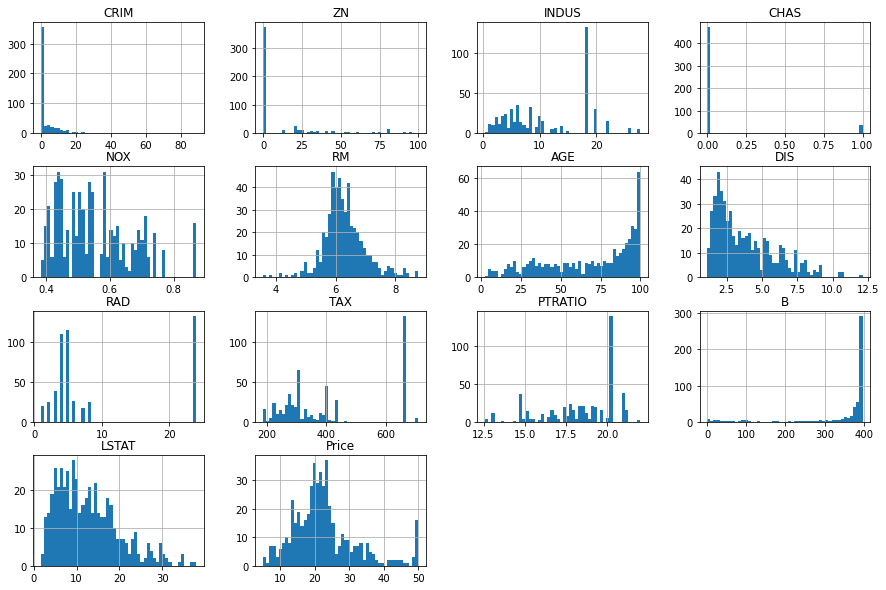

In [59]:
#Veri Dağılımlarının Görselleştirilmesi
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(15,10))
plt.show()

#### 4. 1.Modelin kurulması 

In [60]:
#Verinin Eğitim ve Test verisi olarak ikiye bölünmesi
x= boston.data
y= boston.target

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.2, random_state=0)

print("xtrain shape : ", xtrain.shape)
print("xtest shape : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape :  (102, 13)
ytrain shape :  (404,)
ytest shape :  (102,)


In [61]:
#Modelin Çalıştırılması
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(xtrain, ytrain)

y_pred= regressor.predict(xtest)

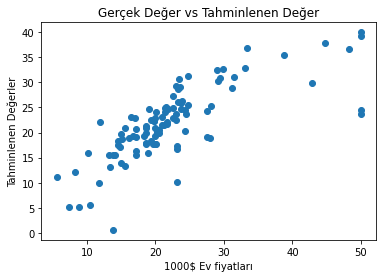

In [62]:
#Sonuçların Görselleştirilmesi
plt.scatter(ytest, y_pred)
plt.xlabel("1000$ Ev fiyatları")
plt.ylabel("Tahminlenen Değerler")
plt.title("Gerçek Değer vs Tahminlenen Değer")
plt.show()

#### 5. 1.Modelin Performansı

In [63]:
#Modelin Performansı
rmse2 = (np.sqrt(mean_squared_error(ytest, y_pred)))                      


print("Eğitim Seti için Modelin Performansı")
print("Fiyat Tahmini")
print("--------------------------------------")
print('Hata Kareleri Ortalaması(RMSE): {}'.format(rmse2))
print("--------------------------------------")
reKare= round(r2_score(ytest, y_pred),2)
print("R2 Skoru: ",reKare)

Eğitim Seti için Modelin Performansı
Fiyat Tahmini
--------------------------------------
Hata Kareleri Ortalaması(RMSE): 5.783509315085135
--------------------------------------
R2 Skoru:  0.59


In [64]:
#

### 6. 2. Model

<AxesSubplot:>

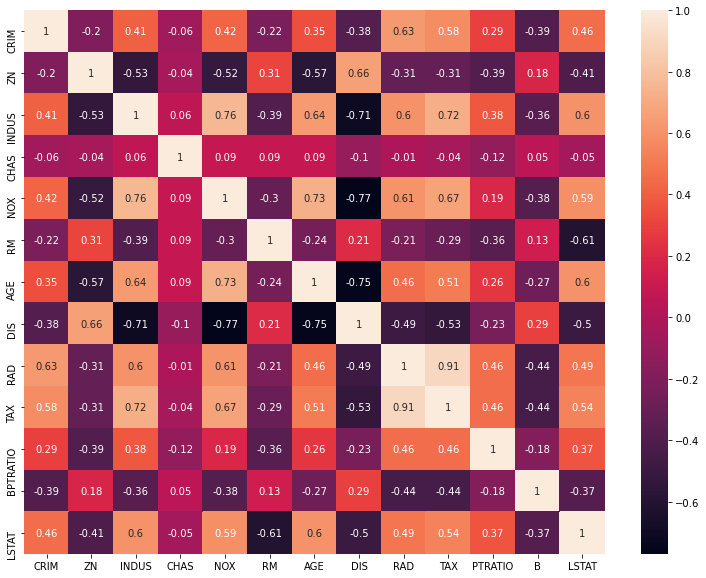

In [65]:
#Isı Haritası 
bos_1= pd.DataFrame(boston.data, columns= boston.feature_names)

correlation_matrix= bos_1.corr().round(2)
plt.figure(figsize=(13,10))
sns.heatmap(data=correlation_matrix, annot=True)

(LSTAT= Düşük Gelir Düzeyi / RM= Oda Sayısı)


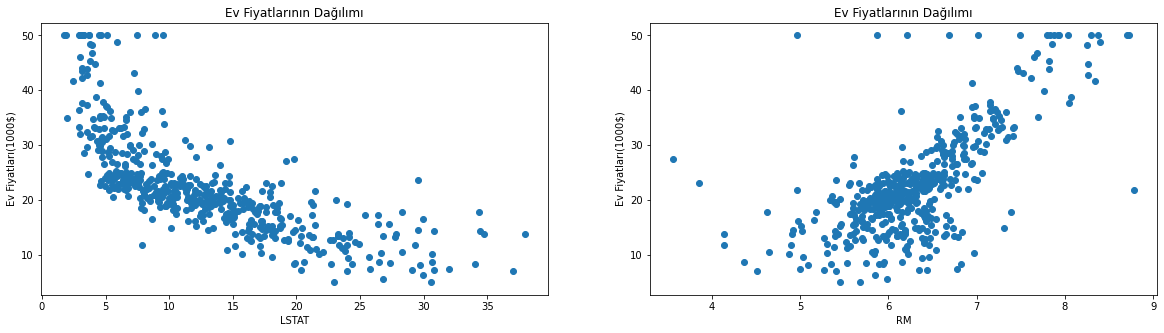

In [74]:
#LSTAT ve RM Değişkenlerinin Görselleştirilmesi
print("(LSTAT= Düşük Gelir Düzeyi / RM= Oda Sayısı)")
plt.figure(figsize=(20,5))
features= ['LSTAT', 'RM']
target= data['Price']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x= data[col]
    y= target
    plt.scatter(x,y, marker='o')
    plt.title("Ev Fiyatlarının Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Ev Fiyatları(1000$)")

#### 7. 2.Modelin Kurulması

In [79]:
#Fiyat ve Oda Sayısı Değişkenlerinin Array formuna aktarılması
X_rooms= data.RM
y_price= data.Price

X_rooms= np.array(X_rooms).reshape(-1,1)
y_price= np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [83]:
#Versetinin Eğitim Ve Test Olarak ikiye Bölünmesi
X_train_1, X_test_1, Y_train_1, Y_test_1= train_test_split(X_rooms, y_price, test_size=0.2, random_state=5)
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [84]:
#Modelin Çalıştırılması
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)

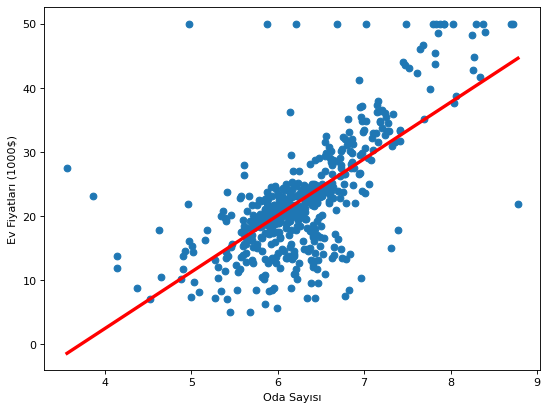

In [86]:
#Modelin Görselleştirilmesi
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
prediction_space= np.linspace(min(X_rooms),
max(X_rooms)).reshape(-1,1)
plt.scatter(X_rooms, y_price)
plt.plot(prediction_space, reg_1.predict(prediction_space),
color= 'red', linewidth=3)
plt.ylabel("Ev Fiyatları (1000$)")
plt.xlabel("Oda Sayısı")
plt.show()

#### 8. 2.Modelin Performansı

In [89]:
#RMSE ve R2 Ölçütleri
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("2.Modelin Performansı")
print("--------------------------------------")
print('Hata Kareleri Ortalaması(RMSE): {}'.format(rmse))
print("--------------------------------------")
print('R2 Skoru: {}'.format(r2))
print("\n")

2.Modelin Performansı
--------------------------------------
Hata Kareleri Ortalaması(RMSE): 6.972277149440585
--------------------------------------
R2 Skoru: 0.43




#

Anıl Alkan - 2018469005
Sefa Başıbütün - 2018469016
Hasan Can Çelik - 2018469068